# Sololearn: Bob the Builder Solution

Building a Logistic Regression Model

## Task:

You are given a feature matrix and a single datapoint to predict. Your job will be to build a Logistic Regression model with the feature matrix and make a prediction (1 or 0) of the single datapoint.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
#Input data
number_of_rows = 6
X = [1,3,3,5,5,7,3,1,5,3,7,5]
target = [1,1,1,0,0,0]

In [3]:
arr_x = np.array(X)
Points_coord = arr_x.reshape(number_of_rows,2)

arr_y = np.array(target)

x_point = [float(x) for x in X[::2]]
y_point = [int(i) for i in X[1::2]]
data = {"x_point":x_point,"y_point":y_point,"target":target}
data

{'x_point': [1.0, 3.0, 5.0, 3.0, 5.0, 7.0],
 'y_point': [3, 5, 7, 1, 3, 5],
 'target': [1, 1, 1, 0, 0, 0]}

In [4]:
df=pd.DataFrame(data)
df

,x_point,y_point,target
0,1.0,3,1
1,3.0,5,1
2,5.0,7,1
3,3.0,1,0
4,5.0,3,0
5,7.0,5,0


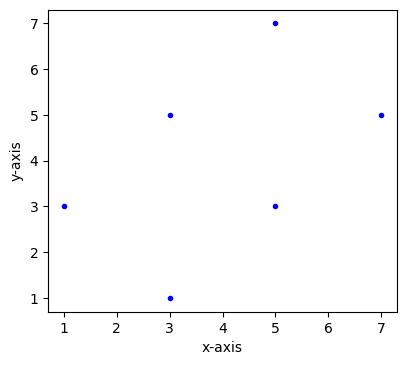

In [5]:
# Points representation
fig,ax = plt.subplots(figsize=(4.5,4),dpi=100)
plt.plot(df["x_point"],df["y_point"],"b.")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [6]:
# Build the model
model = LogisticRegression()
model.fit(df[["x_point","y_point"]], df["target"])

LogisticRegression()

In [7]:
# Theta 0
model.intercept_

array([9.02524618e-17])

In [8]:
# Theta 1
model.coef_

array([[-0.88029644,  0.88029644]])

The single datapoint to predict is (2, 4). Also you can try with another point replacing the numbers in the code below. The prediction is 0 (**False**) if the point is under the regression line and 1 (**True**) if it's above.

The point to predict is over the line.


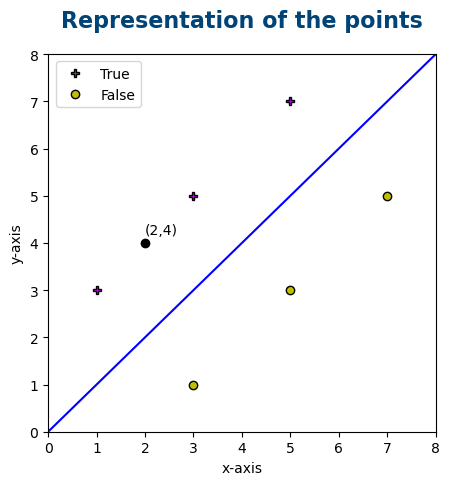

In [9]:
from sklearn.model_selection import train_test_split

fig,ax = plt.subplots(figsize=(5,5),dpi=100)

p_x = [x/10 for x in range(0,85)]

line_bias = model.intercept_

line_w = model.coef_.T

p_y = [(line_w[0]*x + line_bias)/(-1*line_w[1]) for x in p_x]


#New point to predict.

new_point = [2,4]

#Building a plot to show the results.

values = {0:"under",1:"over"}

s = model.predict([new_point])

over_line=df.loc[(df["target"]==1)]
under_line=df.loc[~(df["target"]==1)]

ax.plot(p_x,p_y,c="b")
plt.title("Representation of the points",fontsize=16,fontweight="bold",fontfamily="sans",color="#004477",y=1.05)
ax.plot(over_line["x_point"],over_line["y_point"],"P",ms=6,mec="k",mfc="#cc00ff",label="True")
ax.plot(under_line["x_point"],under_line["y_point"],"o",ms=6,mec="k",mfc="y",label="False")
ax.plot(new_point[0],new_point[1],'ko',ms=6)
plt.annotate(f"({new_point[0]},{new_point[1]})",(new_point[0],new_point[1]+0.2))
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.ylim(0,8)
plt.xlim(0,8)
fig.patch.set_facecolor('w')
ax.set_facecolor('w')

plt.legend(loc=(0.02,0.86),fontsize=10)
print(f"The point to predict is {values[s[0]]} the line.")
plt.show()